In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv(r'C:\Users\Sayan Saha\Downloads\titanic\train.csv')

# Look at the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()        # Check column data types and missing values
df.describe()    # Get summary statistics
df.isnull().sum()  # Check missing values
df['Sex'].value_counts()  # For categorical variables


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Sex
male      577
female    314
Name: count, dtype: int64

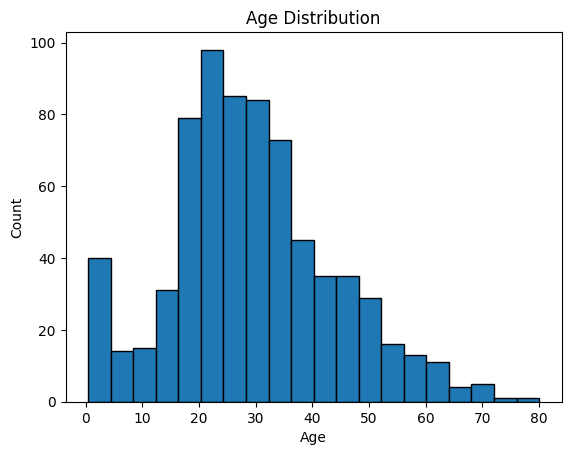

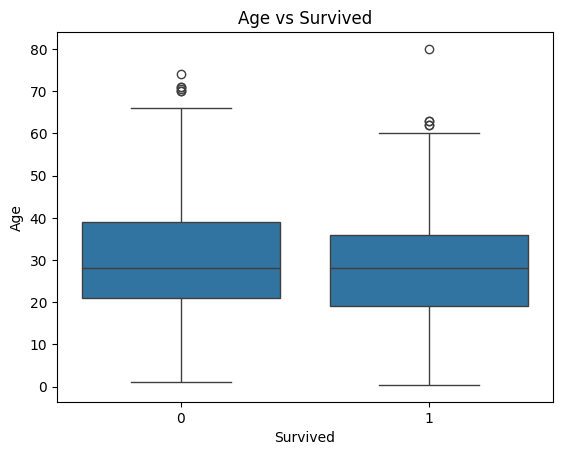

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for 'Age'
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Boxplot of Age vs Survived
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()

# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (optional: to see variable relationships)
sns.pairplot(df, hue='Survived')
plt.show()


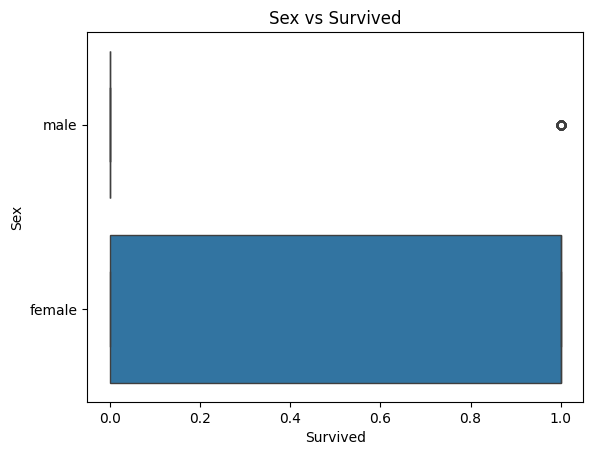

In [26]:
# Boxplot of Sex vs Survived
sns.boxplot(x='Survived', y='Sex', data=df)
plt.title('Sex vs Survived')
plt.show()


In [27]:
print(df.columns)
print(df.info)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May P

In [28]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [29]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


C:\Users\Sayan Saha\AppData\Local\Temp\ipykernel_19528\1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [30]:
# Fill missing cabins with a placeholder
df['Cabin'].fillna('Unknown', inplace=True)


C:\Users\Sayan Saha\AppData\Local\Temp\ipykernel_19528\691399625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


In [31]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [32]:
df.dropna(inplace=True)


In [33]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


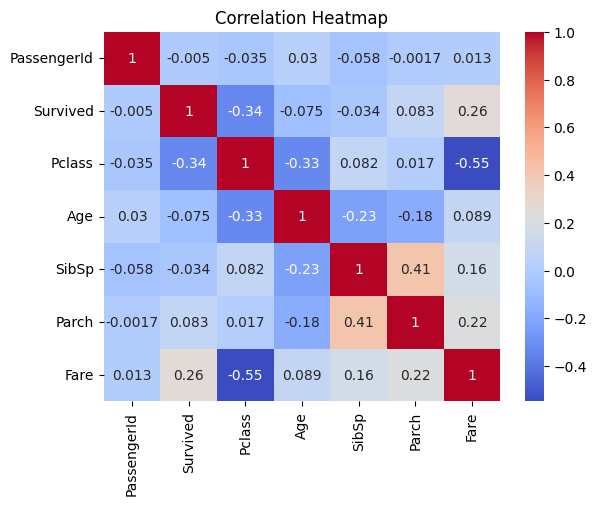

In [34]:
# Correlation Heatmap
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


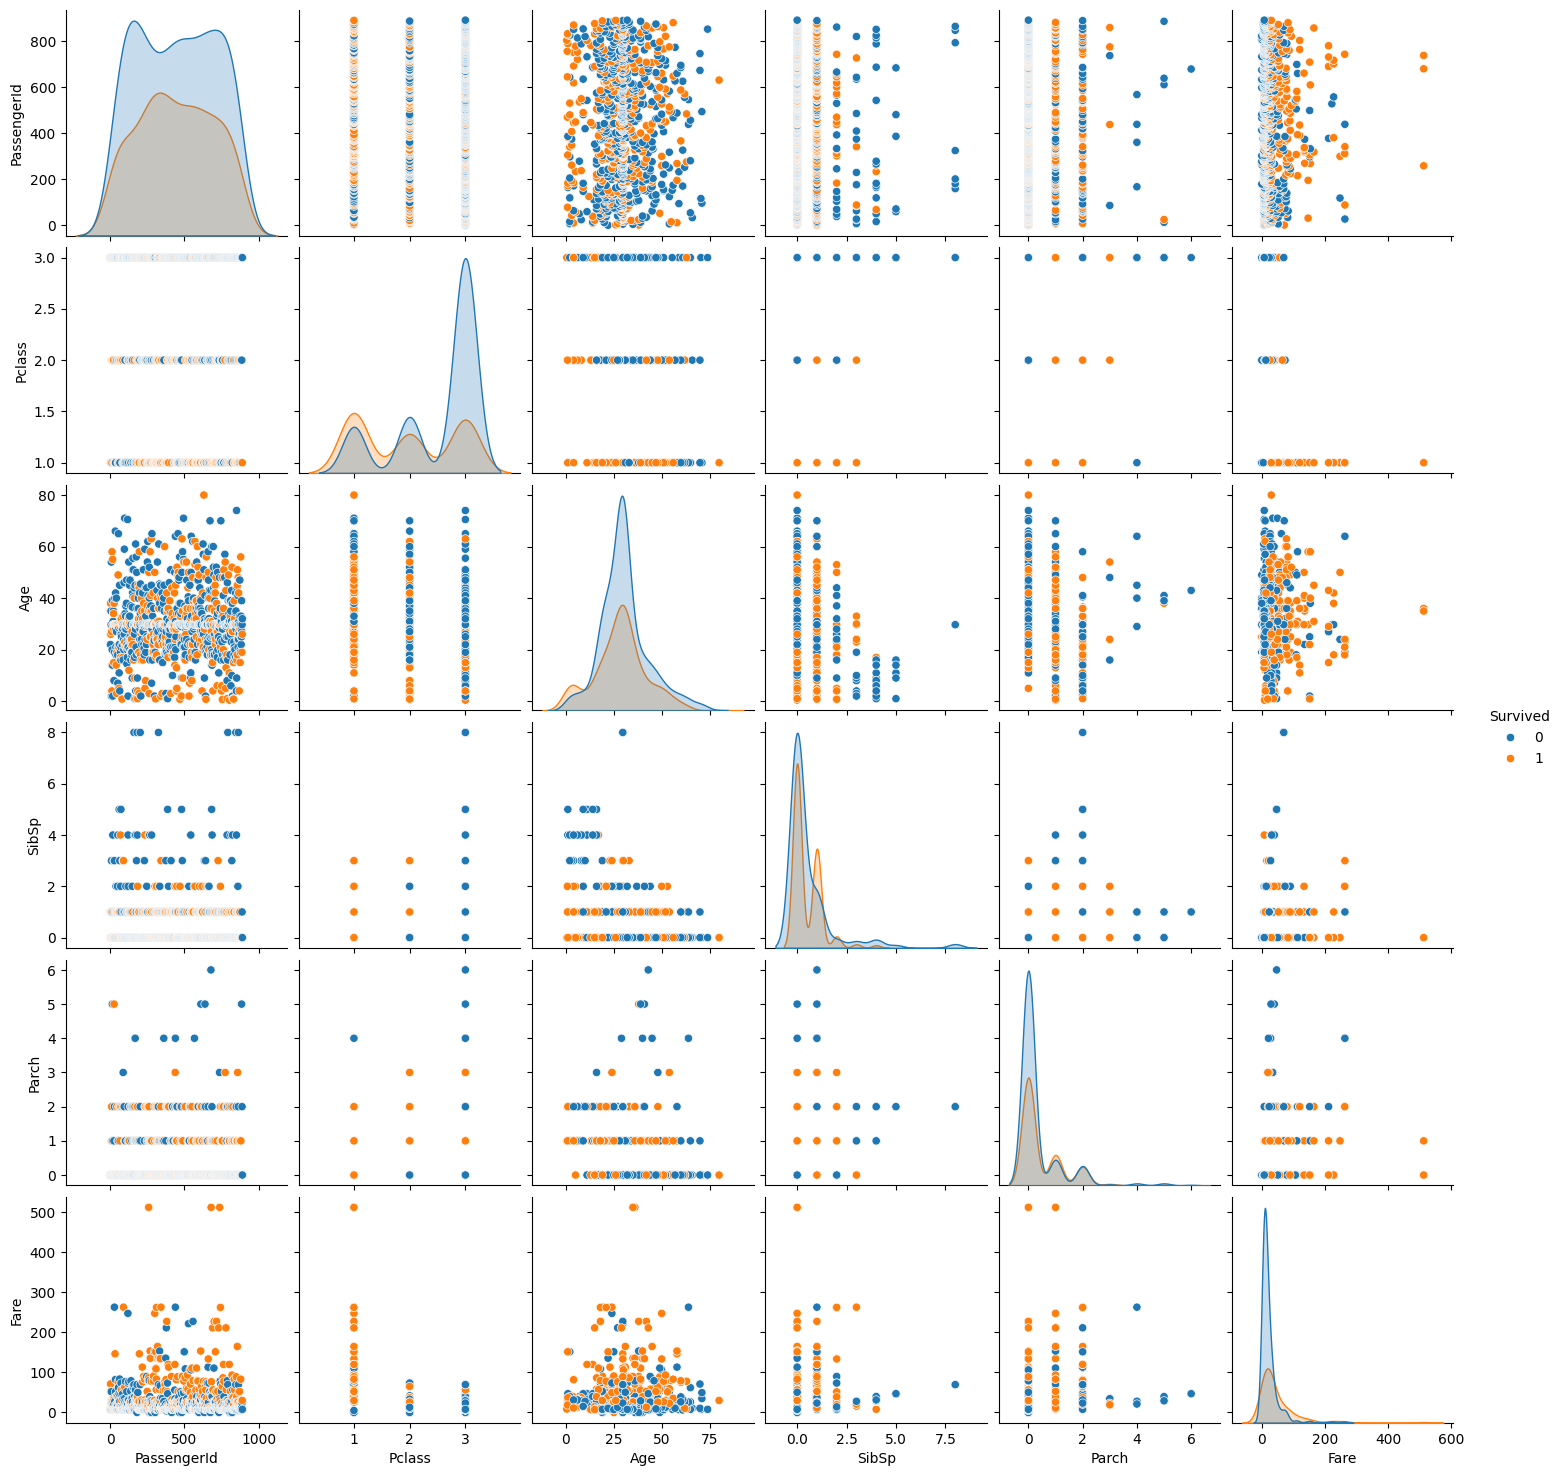

In [35]:
sns.pairplot(df, hue='Survived')
plt.show()


In [36]:
average_age = df['Age'].mean()
print("Average Age:", average_age)


Average Age: 29.65344637067425


In [37]:
average_fare = df['Fare'].mean()
print("Average fare:", average_fare)


Average fare: 32.09668087739032


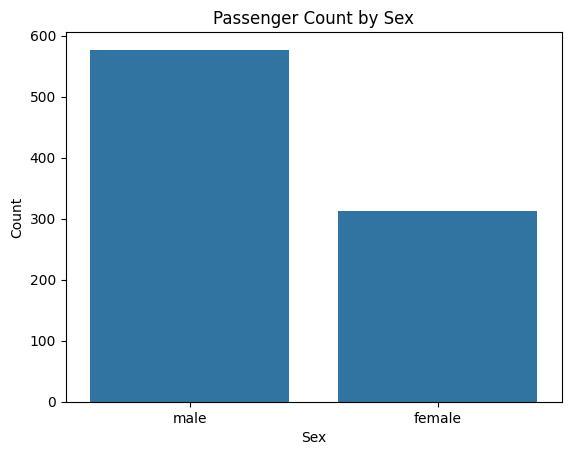

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar graph of counts for 'Sex'
sns.countplot(data=df, x='Sex')

# Add a title
plt.title('Passenger Count by Sex')

# Add labels to x and y axes
plt.xlabel('Sex')
plt.ylabel('Count')

# Show the plot
plt.show()


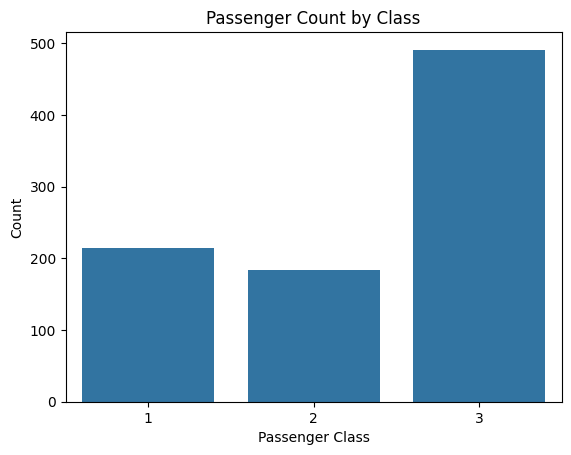

In [39]:


# Plot a bar graph of counts for 'Pclass'
sns.countplot(data=df, x='Pclass')

# Add a title
plt.title('Passenger Count by Class')

# Add labels to x and y axes
plt.xlabel('Passenger Class')
plt.ylabel('Count')

# Show the plot
plt.show()
